<IPython.core.display.Javascript object>


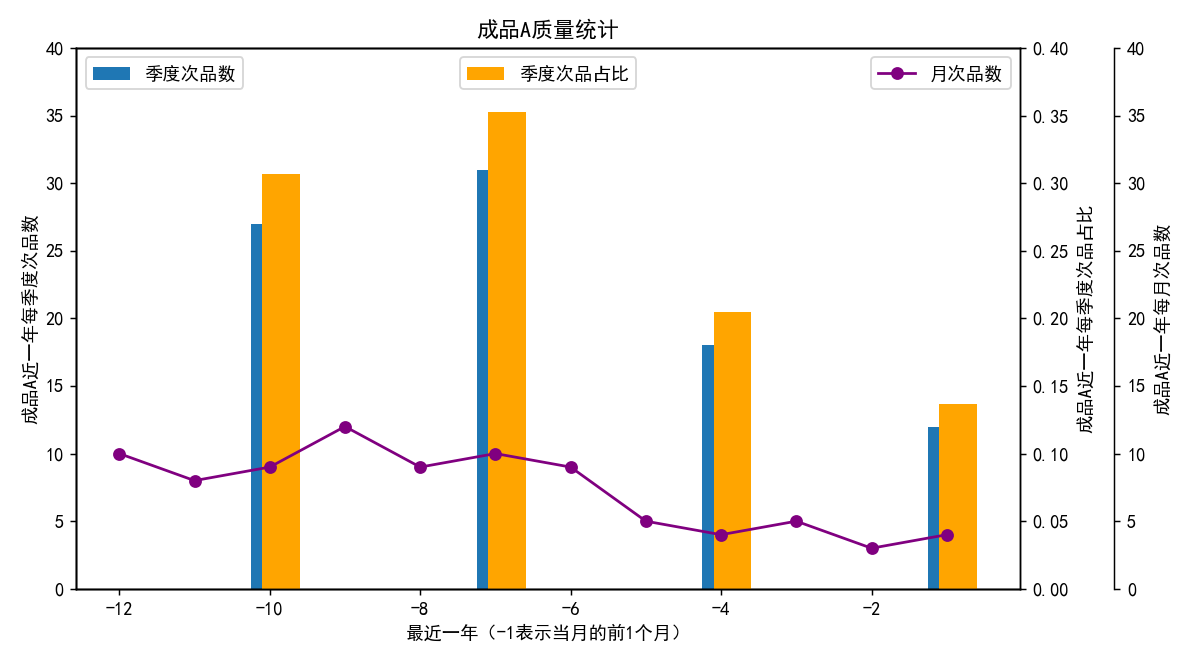

<IPython.core.display.Javascript object>


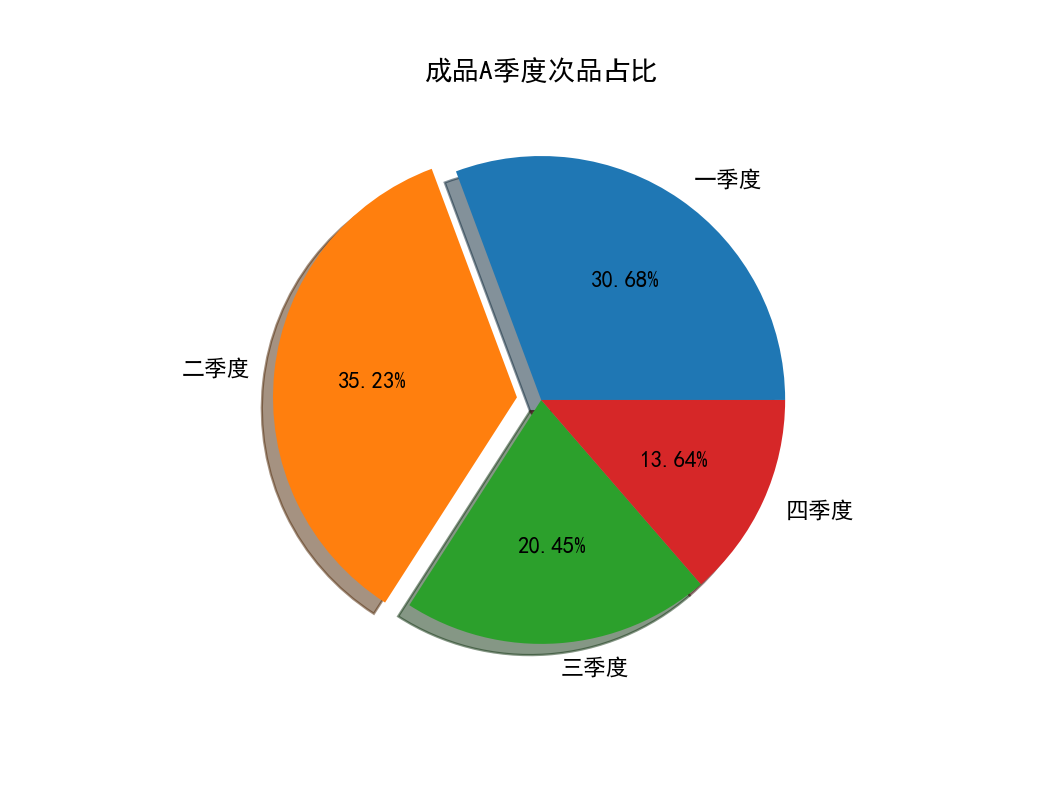

In [99]:
#提高图片显示的分辨率，如果无此语句，图片显示不清晰
%config InlineBackend.figure_format = 'svg' 

#导入matplotlib的子库pyplot并命名为plt
import matplotlib.pyplot as plt 
import numpy as np

#使图形中的中文正常编码显示
plt.rcParams['font.sans-serif'] = ['SimHei']
#使坐标轴刻度正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#模拟生产数据
period = range(-12,0)
compA_defectNum = [10, 8, 9, 12, 9, 10, 9, 5, 4, 5, 3, 4]
compB_defectNum = [26, 28, 25, 24, 25, 22, 20, 8, 9, 10, 7, 8]

fig = plt.figure(figsize=(9,5), dpi=80)
ax = fig.add_subplot(1,1,1)

#第一个坐标轴和图，季度次品数
ax.set_ylabel('成品A近一年每季度次品数')
ax.set_xlabel('最近一年（-1表示当月的前1个月）')
quarterAxis = [-10,-7,-4,-1]
compA_defectQuarter = [np.sum(compA_defectNum[i:i+3]) for i in range(0,10,3)]
plt.bar(quarterAxis, compA_defectQuarter, width=0.5, label='季度次品数')
plt.ylim(0,40)
plt.title('成品A质量统计')
ax.legend(loc='upper left')

# 第二个坐标轴和图，季度次品占比
ax2 = ax.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
ax2.set_ylabel('成品A近一年每季度次品占比')
shift = 0.15 
plt.bar([i+shift for i in quarterAxis], compA_defectQuarter/np.sum(compA_defectNum), 
        width=0.5, color='orange', label='季度次品占比')
plt.ylim(0,0.4)
ax2.legend(loc='upper center')

# 第三个坐标和图，月次品数
ax3 = ax.twinx()
ax3.spines['right'].set_position(('axes', 1.1))  # 1.1向右偏移避免重叠
ax3.set_ylabel('成品A近一年每月次品数')
plt.plot(period, compA_defectNum, marker='o',color='purple', label='月次品数')
plt.ylim(0,40)
ax3.legend(loc='upper right')
plt.tight_layout()
#保存第一个图片 #注：savefig要在show前面，否则保存的是空白的图片
plt.savefig("002_1_data_BarLineCombineChart.png", bbox_inches='tight')  
plt.show()

#成品A季度次品占比饼图
plt.figure()
plt.title('成品A季度次品占比')
labels = ["一季度", "二季度", "三季度", "四季度"]
exp = [0, 0.1, 0, 0]
plt.pie(x=compA_defectQuarter, labels=labels, explode=exp, shadow=True, autopct="%0.2f%%")

#保存第二个图片 #注：savefig要在show前面，否则保存的是空白的图片
plt.savefig("002_2_data_PieChart.png")  
plt.show()